In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np
import matplotlib.colors as mcolors
from sklearn.mixture import GaussianMixture

In [10]:
df = pd.read_csv(r"C:\Users\Joel Efraín\Desktop\_workspace\geo_sentry\var\sample_client\sample_project\processed_data\operativity.csv", sep=";")
df = df.dropna()
df['east'] = df['east'].astype(float).values
df['north'] = df['north'].astype(float).values

In [11]:
df.head()

,structure,sensor_type,code,east,north,elevation,operativiy,last_record,last_value
0,DME_CHO,PCV,PCV-SH23-101,808745.856,9158796.915,2563.591,True,2025-03-08,2.143997
1,DME_CHO,PCV,PCV-SH23-102,808893.765,9158919.897,2526.313,True,2025-03-30,-19.301224
2,DME_CHO,PCV,PCV-SH23-103,808944.542,9159043.519,2512.112,True,2025-03-30,0.638937
3,DME_SUR,PCV,PCV-SH17-101,809676.294,9156254.521,2502.257,True,2025-04-03,67.925238
4,PAD_1A,PCV,PCV-SH14-01,809665.799,9158500.421,2819.153,True,2025-03-30 06:00:00.000,-4.886231


In [12]:
# Agrupar por 'structure' y 'sensor_type' y contar las ocurrencias
distribution = df.groupby(['structure', 'sensor_type']).size().reset_index(name='count')

print(distribution)

    structure sensor_type  count
0     DME_CHO         PCT     38
1     DME_CHO         PCV      3
2     DME_CHO         PTA      3
3     DME_SUR         PCT     18
4     DME_SUR         PCV      1
5     DME_SUR         PTA      2
6      PAD_1A         PCV      4
7      PAD_1A         PTA     14
8      PAD_2A        CPCV      2
9      PAD_2A         PCV      3
10     PAD_2A         PTA      5
11     PAD_2A        SACV      2
12  PAD_2B_2C         PCT     29
13  PAD_2B_2C         PCV     20
14  PAD_2B_2C         PTA      6
15  PAD_2B_2C        SACV      3


In [14]:
structures = distribution['structure'].unique()
print(structures)

['DME_CHO' 'DME_SUR' 'PAD_1A' 'PAD_2A' 'PAD_2B_2C']


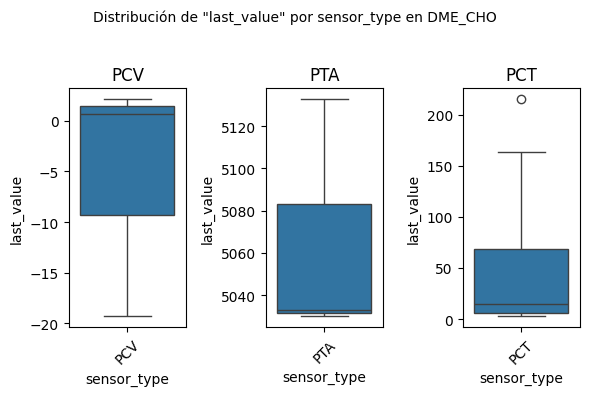

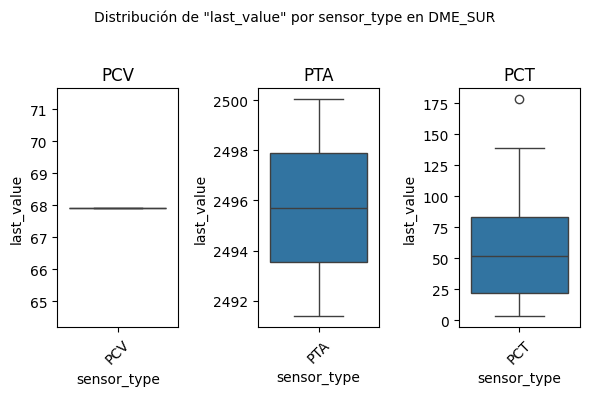

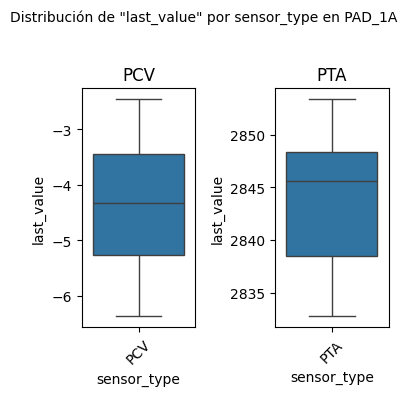

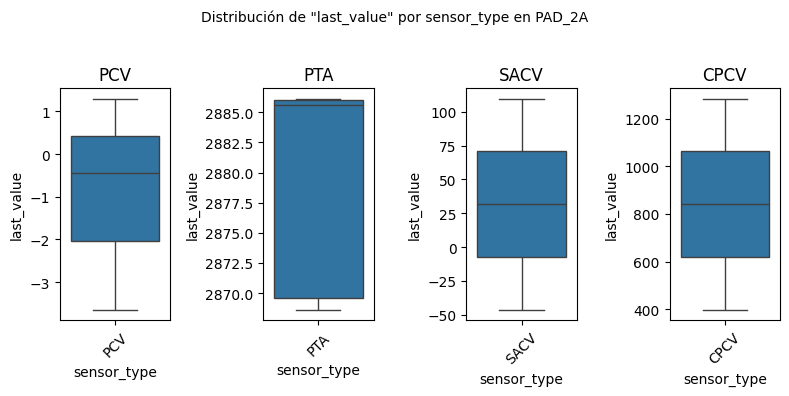

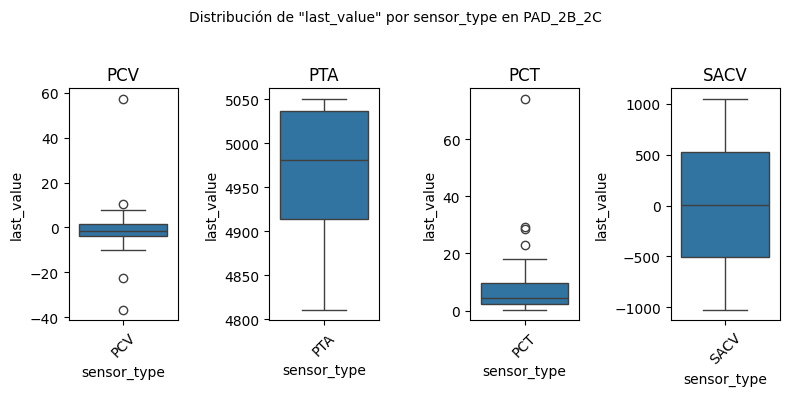

In [15]:
# Crear gráficos para cada estructura con subplots por sensor_type
for structure in structures:
    subset = df[df['structure'] == structure]
    sensor_types = subset['sensor_type'].unique()
    num_sensor_types = len(sensor_types)
    
    fig, axes = plt.subplots(nrows=1, ncols=num_sensor_types, figsize=(2 * num_sensor_types, 4))

    fig.suptitle(f'Distribución de "last_value" por sensor_type en {structure}', fontsize=10)
    
    if num_sensor_types == 1:
        axes = [axes]  # Asegurarse de que axes sea iterable si hay solo un sensor_type
    
    for ax, sensor_type in zip(axes, sensor_types):
        sensor_subset = subset[subset['sensor_type'] == sensor_type]
        sns.boxplot(data=sensor_subset, x='sensor_type', y='last_value', ax=ax)
        ax.set_title(sensor_type)
        ax.set_xlabel('sensor_type')
        ax.set_ylabel('last_value')
        ax.tick_params(axis='x', rotation=45)
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajustar para no solapar con el título
    plt.show()

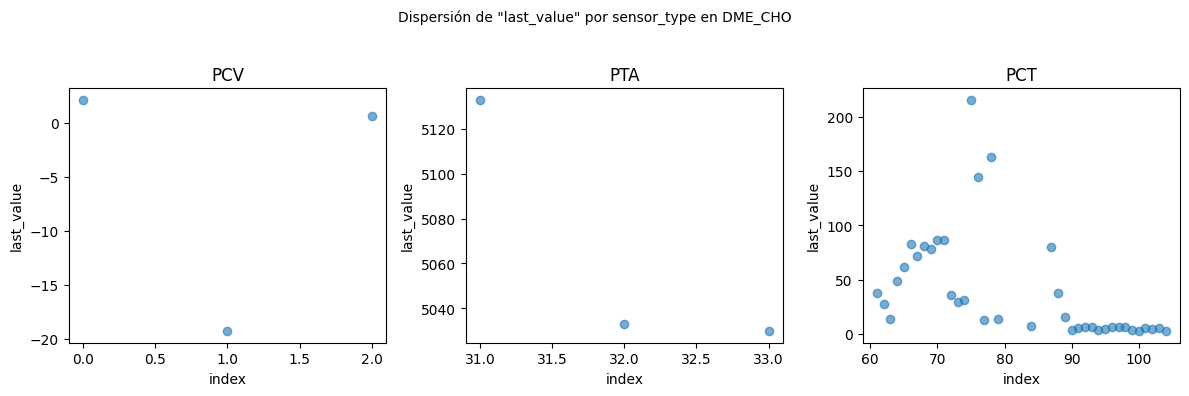

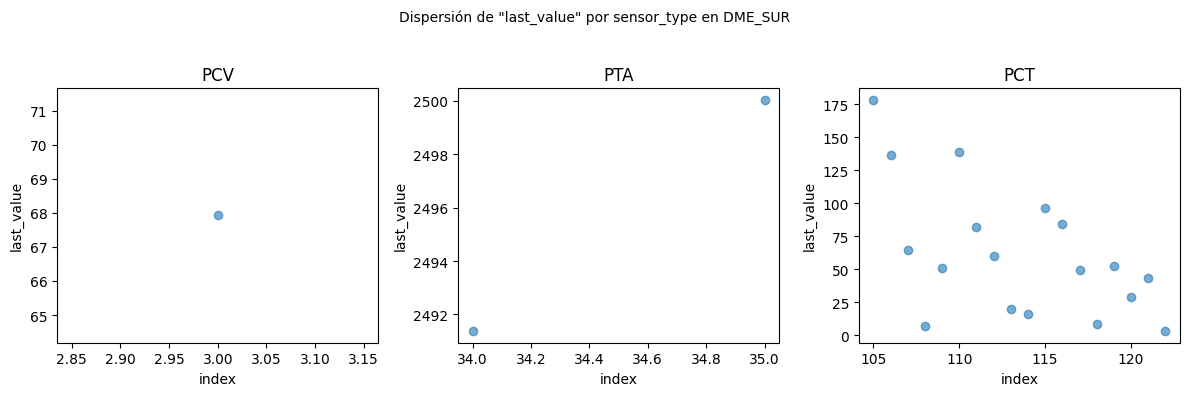

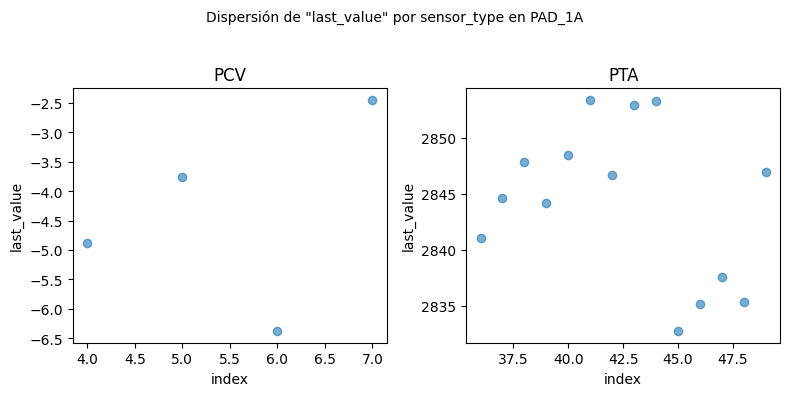

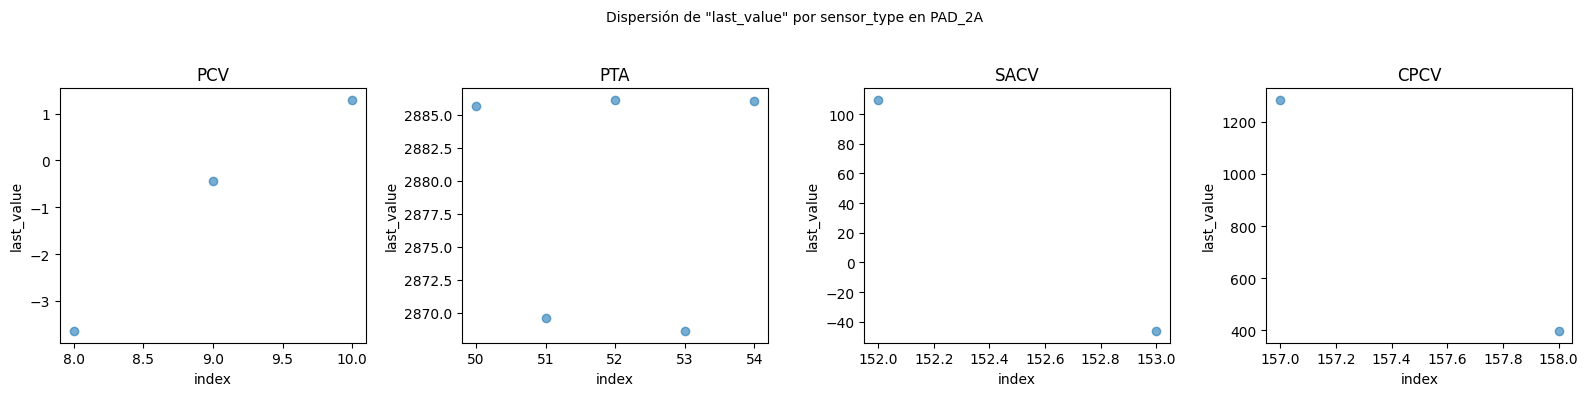

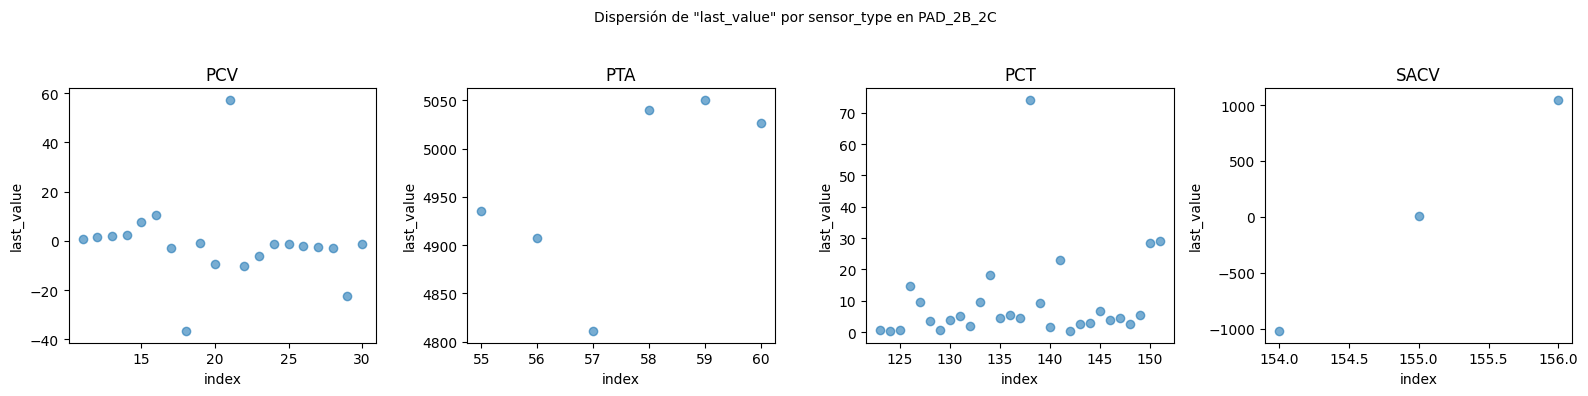

In [16]:
for structure in structures:
    subset = df[df['structure'] == structure]
    sensor_types = subset['sensor_type'].unique()
    num_sensor_types = len(sensor_types)
    
    fig, axes = plt.subplots(nrows=1, ncols=num_sensor_types, figsize=(4 * num_sensor_types, 4))
    fig.suptitle(f'Dispersión de "last_value" por sensor_type en {structure}', fontsize=10)
    
    if num_sensor_types == 1:
        axes = [axes]  # Asegurarse de que axes sea iterable
    
    for ax, sensor_type in zip(axes, sensor_types):
        sensor_subset = subset[subset['sensor_type'] == sensor_type]
        
        # Scatter plot: eje x es índice (o tiempo si tienes), eje y es last_value
        ax.scatter(sensor_subset.index, sensor_subset['last_value'], alpha=0.6)
        ax.set_title(f'{sensor_type}')
        ax.set_xlabel('index')  # Cambiar a 'Tiempo' si tienes columna de timestamp
        ax.set_ylabel('last_value')
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


C:\Users\Joel Efraín\AppData\Local\Temp\ipykernel_17852\909641014.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pct['bubble_size'] = (df_pct['last_value'] / max_val) * bubble_scale


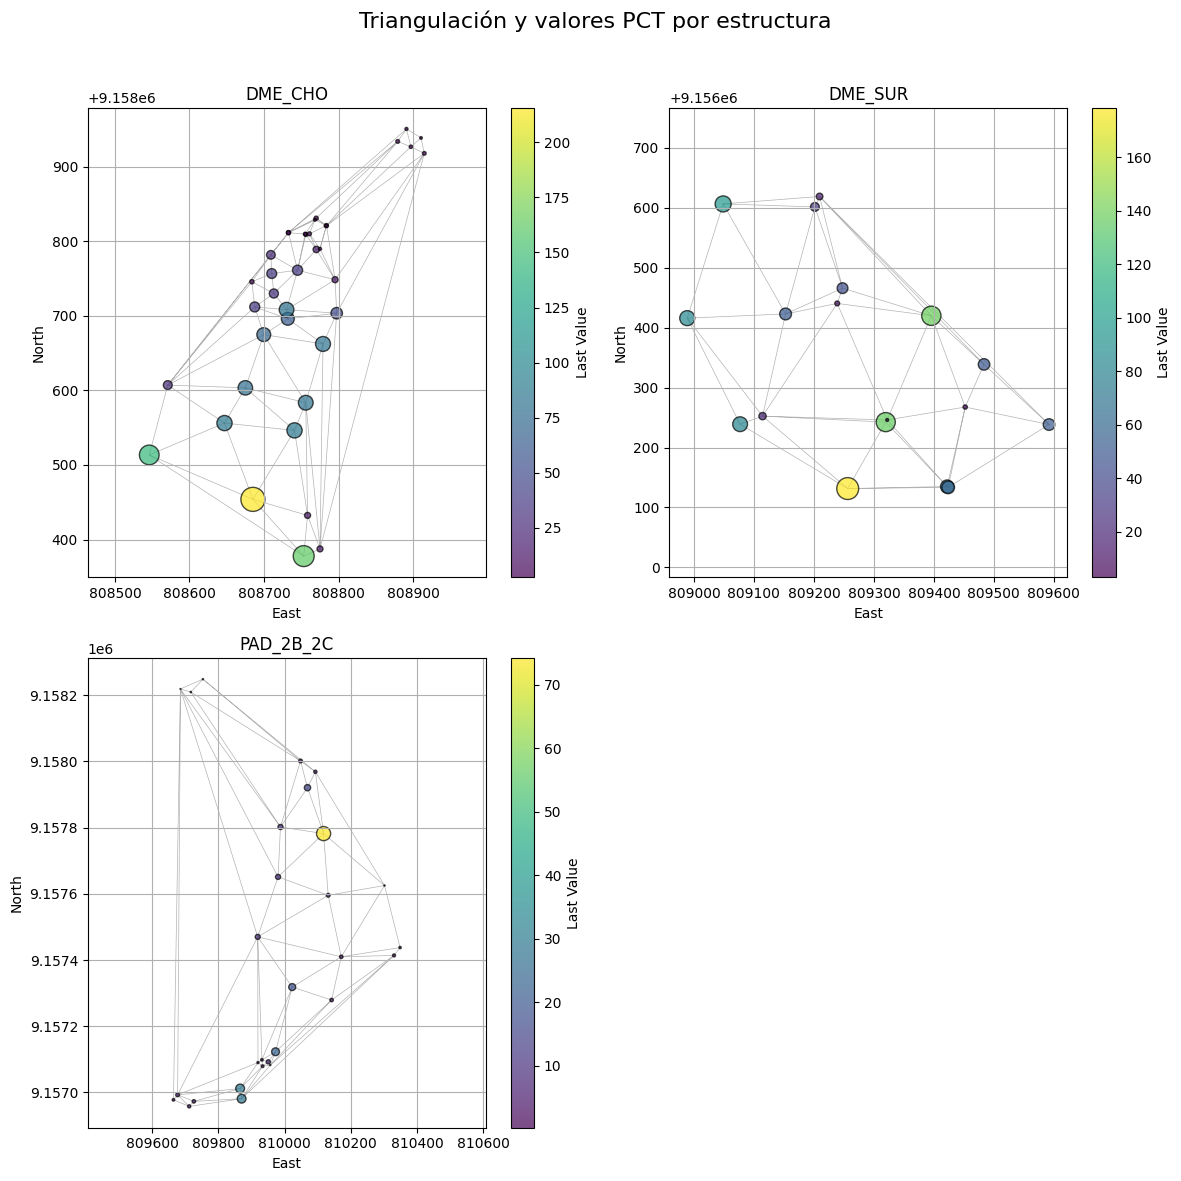

In [17]:
# Filtrar el dataframe por sensor_type='PCT'
df_pct = df[df['sensor_type'] == 'PCT']

# Obtener estructuras únicas
structures = df_pct['structure'].unique()
num_structures = len(structures)

# Layout de subplots
cols = 2
rows = (num_structures + 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 6 * rows))
axes = axes.flatten()

# Escalar burbujas
max_val = df_pct['last_value'].max()
bubble_scale = 300
df_pct['bubble_size'] = (df_pct['last_value'] / max_val) * bubble_scale

# Colormap para la transición de colores
cmap = plt.get_cmap('viridis')  # Puedes cambiar el colormap a cualquier otro, como 'plasma', 'inferno', etc.
norm = mcolors.Normalize(vmin=df_pct['last_value'].min(), vmax=df_pct['last_value'].max())

for i, structure in enumerate(structures):
    subset = df_pct[df_pct['structure'] == structure]
    x = subset['east'].astype(float).values
    y = subset['north'].astype(float).values
    s = subset['bubble_size'].values
    c = subset['last_value'].values  # Usamos last_value para los colores

    ax = axes[i]
    
    # Triangulación si hay suficientes puntos
    if len(x) >= 3:
        triang = tri.Triangulation(x, y)
        ax.triplot(triang, color='gray', linewidth=0.5, alpha=0.6)
    
    scatter = ax.scatter(x, y, s=s, c=c, cmap=cmap, alpha=0.7, edgecolor='k')
    
    ax.set_title(f'{structure}')
    ax.set_xlabel('East')
    ax.set_ylabel('North')
    ax.grid(True)
    ax.axis('equal')

    # Barra de color para mostrar la transición de valores
    fig.colorbar(scatter, ax=ax, orientation='vertical', label='Last Value')

# Eliminar subplots vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('Triangulación y valores PCT por estructura', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


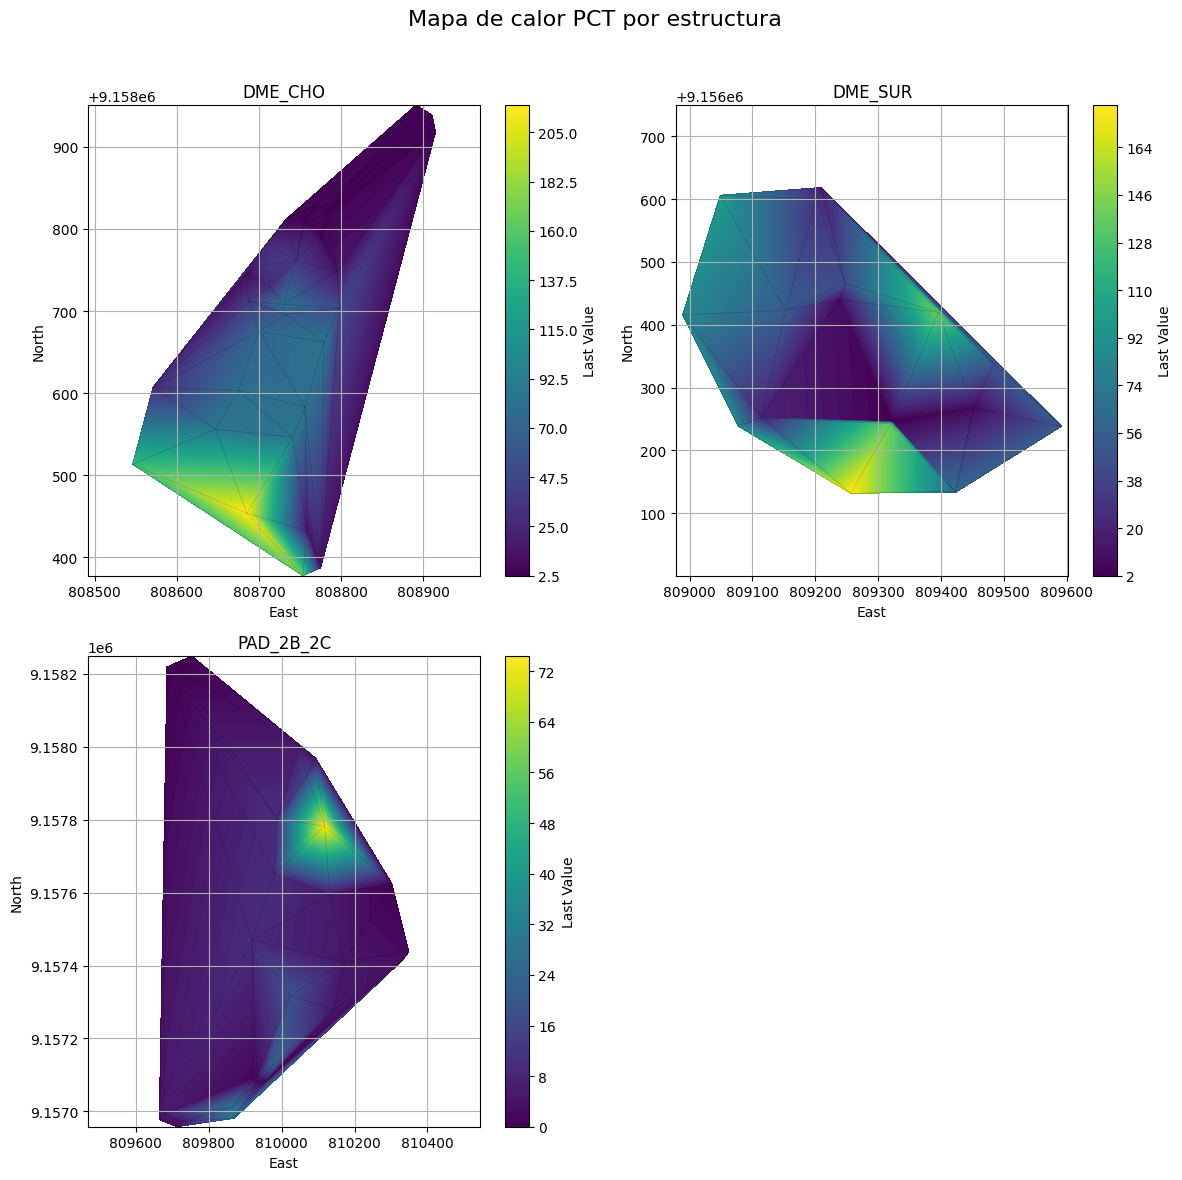

In [18]:
# Filtrar el dataframe por sensor_type='PCT'
df_pct = df[df['sensor_type'] == 'PCT']

# Obtener estructuras únicas
structures = df_pct['structure'].unique()
num_structures = len(structures)

# Layout de subplots
cols = 2
rows = (num_structures + 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 6 * rows))
axes = axes.flatten()

# Colormap base
cmap = plt.get_cmap('viridis')

for i, structure in enumerate(structures):
    subset = df_pct[df_pct['structure'] == structure]
    
    x = subset['east'].astype(float).values
    y = subset['north'].astype(float).values
    z = subset['last_value'].values

    # Filtrar valores válidos
    valid_mask = np.isfinite(x) & np.isfinite(y) & np.isfinite(z)
    x, y, z = x[valid_mask], y[valid_mask], z[valid_mask]

    ax = axes[i]

    if len(x) >= 3:
        triang = tri.Triangulation(x, y)

        # Normalización individual por estructura
        norm = mcolors.Normalize(vmin=np.min(z), vmax=np.max(z))
        tcf = ax.tricontourf(triang, z, cmap=cmap, levels=100, norm=norm)
        ax.triplot(triang, color='k', linewidth=0.3, alpha=0.3)

        # Barra de color individual
        cbar = fig.colorbar(tcf, ax=ax, orientation='vertical')
        cbar.set_label('Last Value')

    ax.set_title(f'{structure}')
    ax.set_xlabel('East')
    ax.set_ylabel('North')
    ax.grid(True)
    ax.axis('equal')

# Eliminar subplots vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('Mapa de calor PCT por estructura', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


C:\Users\Joel Efraín\AppData\Local\Temp\ipykernel_17852\4098699792.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_structure['cluster'] = best_gmm.predict(X)


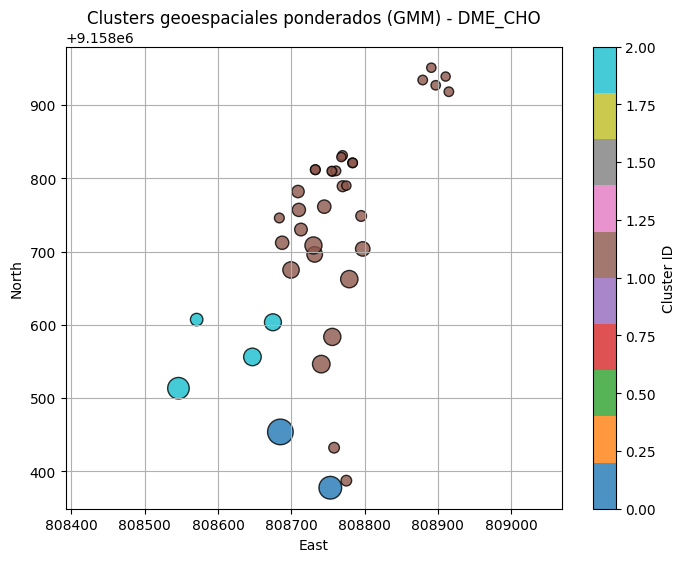

Columnas de df_structure para la estructura DME_CHO: ['structure', 'sensor_type', 'code', 'east', 'north', 'elevation', 'operativiy', 'last_record', 'last_value', 'cluster']
Grupo para la estructura: DME_CHO
    structure sensor_type     code         east         north   elevation  \
75    DME_CHO         PCT    CH-41  808685.1800  9.158454e+06  2709.90750   
78    DME_CHO         PCT    CH-44  808753.3160  9.158378e+06  2730.80800   
63    DME_CHO         PCT    CH-21  808795.3925  9.158749e+06  2612.80300   
61    DME_CHO         PCT     CH-1  808745.0770  9.158761e+06  2590.84500   
65    DME_CHO         PCT    CH-23  808731.9985  9.158696e+06  2624.03700   
66    DME_CHO         PCT    CH-24  808779.2150  9.158662e+06  2630.57100   
67    DME_CHO         PCT    CH-25  808699.7155  9.158675e+06  2630.73400   
62    DME_CHO         PCT     CH-2  808709.2810  9.158782e+06  2591.20600   
68    DME_CHO         PCT    CH-26  808756.0610  9.158584e+06  2660.07500   
70    DME_CHO         

C:\Users\Joel Efraín\AppData\Local\Temp\ipykernel_17852\4098699792.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_structure['cluster'] = best_gmm.predict(X)


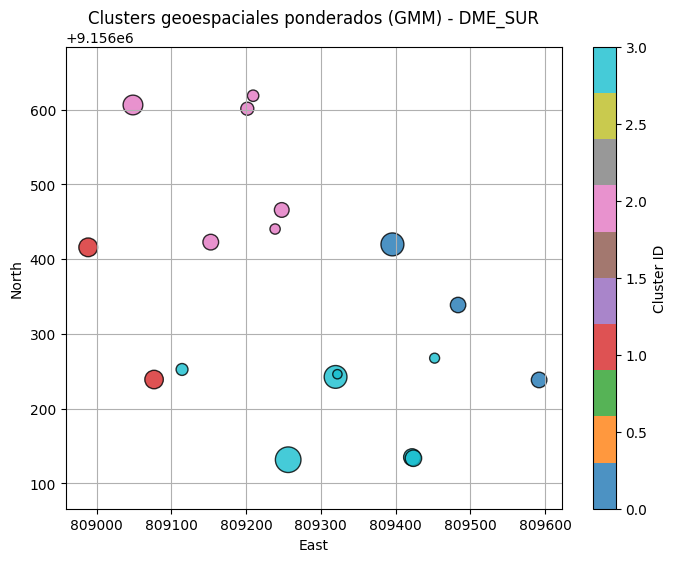

C:\Users\Joel Efraín\AppData\Local\Temp\ipykernel_17852\4098699792.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_structure['cluster'] = best_gmm.predict(X)


Columnas de df_structure para la estructura DME_SUR: ['structure', 'sensor_type', 'code', 'east', 'north', 'elevation', 'operativiy', 'last_record', 'last_value', 'cluster']
Grupo para la estructura: DME_SUR
    structure sensor_type  code         east         north  elevation  \
110   DME_SUR         PCT  P-06  809395.7835  9.156420e+06  2648.4095   
109   DME_SUR         PCT  P-05  809591.9815  9.156238e+06  2558.7775   
117   DME_SUR         PCT  P-13  809483.5920  9.156339e+06  2607.4645   
111   DME_SUR         PCT  P-07  809076.9650  9.156239e+06  2749.1985   
116   DME_SUR         PCT  P-12  808988.8565  9.156416e+06  2799.1380   
115   DME_SUR         PCT  P-11  809048.7275  9.156606e+06  2798.8725   
114   DME_SUR         PCT  P-10  809209.4470  9.156618e+06  2739.2025   
119   DME_SUR         PCT  P-15  809152.7930  9.156423e+06  2739.4160   
120   DME_SUR         PCT  P-16  809201.6585  9.156601e+06  2738.8615   
118   DME_SUR         PCT  P-14  809238.8490  9.156440e+06  27

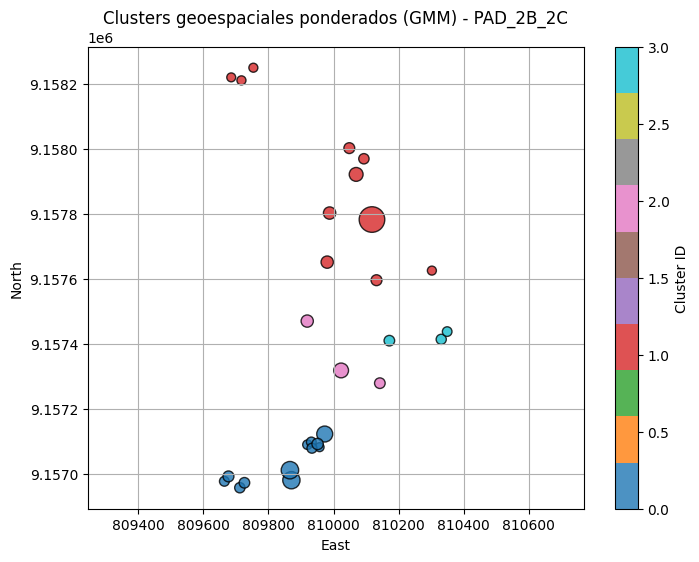

Columnas de df_structure para la estructura PAD_2B_2C: ['structure', 'sensor_type', 'code', 'east', 'north', 'elevation', 'operativiy', 'last_record', 'last_value', 'cluster']
Grupo para la estructura: PAD_2B_2C
     structure sensor_type         code         east         north  elevation  \
147  PAD_2B_2C         PCT   PAD OVER-2  809726.1400  9.156973e+06  2743.0300   
146  PAD_2B_2C         PCT   PAD OVER-1  809711.9810  9.156958e+06  2754.0170   
144  PAD_2B_2C         PCT  PAD 2B-FS-8  809933.6660  9.157079e+06  2664.1930   
145  PAD_2B_2C         PCT  PAD 2B-FS-9  809951.0270  9.157092e+06  2657.7640   
150  PAD_2B_2C         PCT   PAD OVER-5  809870.4654  9.156981e+06  2691.0493   
149  PAD_2B_2C         PCT   PAD OVER-4  809677.0740  9.156993e+06  2743.4840   
148  PAD_2B_2C         PCT   PAD OVER-3  809664.4880  9.156978e+06  2753.8420   
151  PAD_2B_2C         PCT   PAD OVER-6  809865.9570  9.157012e+06  2691.5921   
143  PAD_2B_2C         PCT  PAD 2B-FS-7  809931.7390  9.157

In [25]:
# Filtrar por sensor_type='PCT'
df_pct = df[df['sensor_type'] == 'PCT'].copy()

# Eliminar filas donde 'last_value' es NaN
df_pct = df_pct.dropna(subset=['last_value'])

# Omitir estructuras que no tienen sensores PCT
estructuras_validas = df_pct['structure'].dropna().unique()
df_pct = df_pct[df_pct['structure'].isin(estructuras_validas)]

# Asegurarse de que las columnas 'east' y 'north' sean de tipo float
df_pct['east'] = df_pct['east'].astype(float)
df_pct['north'] = df_pct['north'].astype(float)

# Iterar sobre cada 'structure'
for structure in df_pct['structure'].unique():
    # Filtrar los datos de la estructura actual
    df_structure = df_pct[df_pct['structure'] == structure]

    # Datos para clustering
    X = df_structure[['east', 'north']].values
    weights = df_structure['last_value'].astype(float).values

    # Asegurarse de que no haya NaNs en los pesos
    weights = weights[~np.isnan(weights)]

    # Normalizar pesos para evitar dominancia
    weights = weights / np.max(weights)

    # Crear un conjunto de datos ponderado replicando puntos según sus pesos
    X_weighted = []
    for i in range(len(X)):
        # Usar int() solo si el peso es un valor válido
        if weights[i] > 0:
            X_weighted.extend([X[i]] * int(weights[i] * 100))  # multiplicamos por 10 para darle mayor peso
    X_weighted = np.array(X_weighted)

    # Aplicar Gaussian Mixture Model con los datos ponderados
    lowest_bic = np.inf
    best_gmm = None
    bic_scores = []
    n_components_range = range(1, 5)

    for n_components in n_components_range:
        gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=15)
        gmm.fit(X_weighted)
        bic = gmm.bic(X_weighted)
        bic_scores.append(bic)

        if bic < lowest_bic:
            lowest_bic = bic
            best_gmm = gmm

    # Asignar etiquetas de cluster
    df_structure['cluster'] = best_gmm.predict(X)

    # Visualización para esta estructura
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(
        df_structure['east'], df_structure['north'],
        c=df_structure['cluster'], cmap='tab10',
        s=40 + 300 * weights,  # Tamaño de las burbujas proporcional al peso
        alpha=0.8, edgecolor='k'
    )
    plt.title(f'Clusters geoespaciales ponderados (GMM) - {structure}')
    plt.xlabel('East')
    plt.ylabel('North')
    plt.colorbar(scatter, label='Cluster ID')
    plt.grid(True)
    plt.axis('equal')
    plt.show()

    # Verificar que la columna 'cluster' se ha asignado correctamente
    print(f"Columnas de df_structure para la estructura {structure}: {df_structure.columns.tolist()}")

    # Imprimir una tabla con los valores de east, north, last_value y cluster para cada estructura
    print(f"Grupo para la estructura: {structure}")
    print(df_structure.sort_values(by='cluster'))
    print("\n")